**Importing necessary library**


In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 13
matplotlib.rcParams['xtick.labelsize'] = 11
matplotlib.rcParams['ytick.labelsize'] = 11
matplotlib.rcParams['text.color'] = 'b'

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Dataset Loading**

In [5]:
sale = pd.read_excel('/content/Sample - Superstore.xls')
sale

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [6]:
#sdescription of the dataset with numeric entries in it.
sale.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


**Data Cleaning.**

In [8]:
#removing the columns not required for forecasting.

cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
sale.drop(cols, axis = 1, inplace = True)


KeyError: ignored

In [9]:
#displaying the data after removing the columns.
sale

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680
...,...,...
9989,2014-01-21,25.2480
9990,2017-02-26,91.9600
9991,2017-02-26,258.5760
9992,2017-02-26,29.6000


In [10]:
#checking for null values
sale.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [11]:
#Sorting the Order Date 
sale = sale.sort_values('Order Date')

In [13]:
#grouping sales according to Order Date
sale.groupby('Order Date')['Sales'].sum().reset_index()

#displaying the min and max values of Order Date
print(sale['Order Date'].min())
print(sale['Order Date'].max())

2014-01-03 00:00:00
2017-12-30 00:00:00


In [20]:
#setting the 'Order Date' as index
sale = sale.set_index('Order Date')
sale.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-04', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-06', '2014-01-06',
               '2014-01-06', '2014-01-06',
               ...
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-30',
               '2017-12-30', '2017-12-30', '2017-12-30', '2017-12-30',
               '2017-12-30', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=9994, freq=None)

In [21]:
#calculating the average the daily sales value for each month and using it at start of each month as the timestamp
df = sale['Sales'].resample('MS').mean()
df['2017':]

Order Date
2017-01-01    283.686284
2017-02-01    189.730219
2017-03-01    247.362827
2017-04-01    179.909045
2017-05-01    182.897150
2017-06-01    216.251942
2017-07-01    200.285027
2017-08-01    289.545358
2017-09-01    191.430614
2017-10-01    260.996387
2017-11-01    258.056264
2017-12-01    181.448742
Freq: MS, Name: Sales, dtype: float64

**Time series forecasting with ARIMA model**

In [17]:
#setting the typical ranges for p, d, q
p = d = q = range(0, 2)

#taking and setting all possible combination for p, d and q
ar = list(itertools.product(p, d, q))
seasonal_ar = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [22]:
#Using the Grid Search find the optimal set of parameters that yields the best performance
for parameter in ar:
    for parameter_seasonal in seasonal_ar:
        try:
            model = sm.tsa.statespace.SARIMAX(df, order = parameter, seasonal_order = parameter_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = model.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(parameter, parameter_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:661.5238453481245


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1605.5645359831406
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:402.0746678479059
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:568.0812131286175
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:563.3702892229122
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:395.7387013652758
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:624.7073376670655


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1777.796756342886
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:404.05723836321187
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:565.8511871074745
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:563.4641113529528
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:397.265248438447
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:539.8605974537055


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1882.025659809278
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:413.4421987151014
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:540.1473655055302


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1745.3480387881225
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:411.15022415991064
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:505.24941907182125
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1556.616847321874
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:397.56646108397985
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:507.00994558513094
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1783.1652100440988
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:392.09332875534426
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:553.9945048912664


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2147.917442130955
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:404.0620300756084
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:552.9272857949783
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:553.5803860727247
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:397.2757103427846


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:520.9333118629706


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1853.8102106169008
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:405.5034128343761


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:522.7165663166422
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:524.5238798910575
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:396.08182424063034
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:519.8818905467436


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1569.7129721929773
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:408.05937080543566
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:521.8609414870156


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1731.9018012152405
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:399.85308065730123
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:505.56288669332395


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1812.3330364694818
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:399.56190080712946
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:507.52247737023185
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1764.5970830434119
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:393.8481987643675


**fitting the ARIMA model**


In [23]:
model_ar = sm.tsa.statespace.SARIMAX(df, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model_ar.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0913      0.286     -0.319      0.750      -0.651       0.469
ma.L1         -0.9982      9.598     -0.104      0.917     -19.810      17.813
ar.S.L12      -0.5598      0.156     -3.594      0.000      -0.865      -0.254
sigma2      2799.1392   2.67e+04      0.105      0.917   -4.95e+04    5.51e+04


**validate the forecasts**

In [24]:
predict = result.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
predict_ci = predict.conf_int()
predict_ci

,lower Sales,upper Sales
Order Date,,
2017-01-01,166.949833,380.855434
2017-02-01,128.374779,341.873712
2017-03-01,201.126556,414.265412
2017-04-01,122.357193,335.174991
2017-05-01,126.153432,338.683176
2017-06-01,87.013283,299.283137
2017-07-01,92.953019,304.987209
2017-08-01,102.323362,314.142879
2017-09-01,103.098063,314.721215


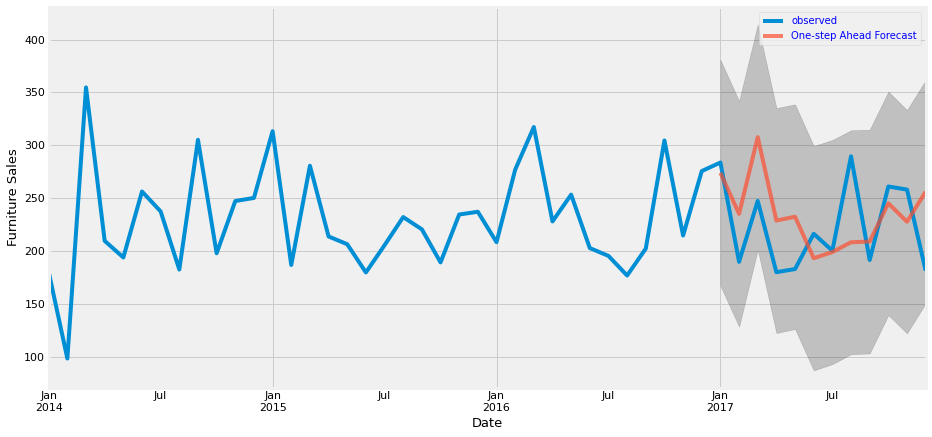

In [26]:
#Visualization of the forecaste
ax = df['2014':].plot(label = 'observed')
predict.predicted_mean.plot(ax = ax, label = 'One-step Ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(predict_ci.index, predict_ci.iloc[:, 0], predict_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [27]:
#Evaluating the metrics
df_hat = predict.predicted_mean
df_truth = df['2017-01-01':]

mse = ((df_hat - df_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 2069.58
The Root Mean Squared Error of our forecasts is 45.49


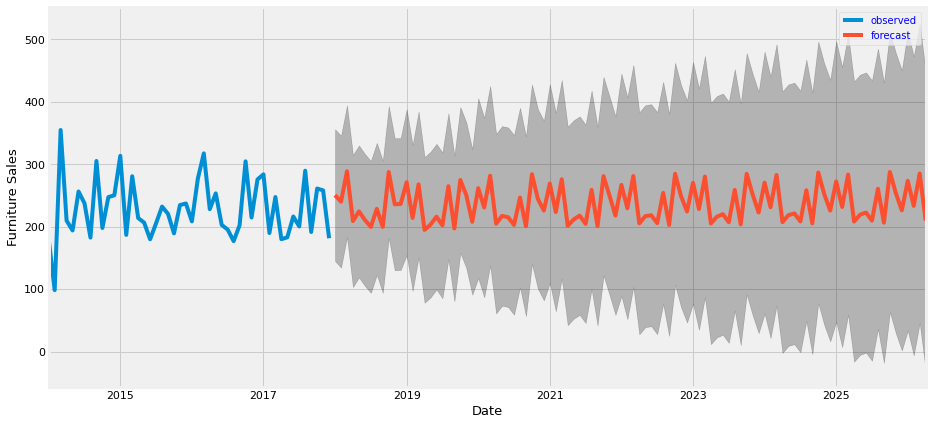

In [28]:
#forcasting the data
pred_uc = result.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = df.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()